In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from models.model import PredictModel

In [45]:
data_path = './data/ds2.csv'
test_size = .1
epochs = 500
batch_size = 32

In [46]:
df = pd.read_csv(data_path)

df['cum_number_of_fault'] = df['number_of_fault'].cumsum()

df

,testing_date,number_of_fault,cum_number_of_fault
0,1,0,0
1,2,0,0
2,3,0,0
3,4,1,1
4,5,1,2
...,...,...,...
176,177,0,223
177,178,0,223
178,179,0,223
179,180,0,223


In [47]:
X = df[['testing_date']].values
y = df[['cum_number_of_fault']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [48]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tenosr = torch.tensor(y_test, dtype=torch.float32)

In [49]:
model = PredictModel()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100:
        print(f'{epoch + 1} / {epochs}, loss: {loss.item()}')



1 / 500, loss: 0.9259176254272461
2 / 500, loss: 16.80512237548828
3 / 500, loss: 54.5034294128418
4 / 500, loss: 0.8802000284194946
5 / 500, loss: 3.4392662048339844
6 / 500, loss: 2.0598537921905518
7 / 500, loss: 1.0761569738388062
8 / 500, loss: 0.9621135592460632
9 / 500, loss: 1.3816958665847778
10 / 500, loss: 0.8128557801246643
11 / 500, loss: 0.41857489943504333
12 / 500, loss: 0.2339400053024292
13 / 500, loss: 0.07359001040458679
14 / 500, loss: 0.2788119912147522
15 / 500, loss: 0.10649246722459793
16 / 500, loss: 0.3266354203224182
17 / 500, loss: 0.058900997042655945
18 / 500, loss: 0.13454405963420868
19 / 500, loss: 0.09160345792770386
20 / 500, loss: 0.07281617075204849
21 / 500, loss: 0.12418835610151291
22 / 500, loss: 0.021428562700748444
23 / 500, loss: 0.09099584817886353
24 / 500, loss: 0.012027053162455559
25 / 500, loss: 0.0666302964091301
26 / 500, loss: 0.03329211845993996
27 / 500, loss: 0.04294527322053909
28 / 500, loss: 0.04403074085712433
29 / 500, loss:

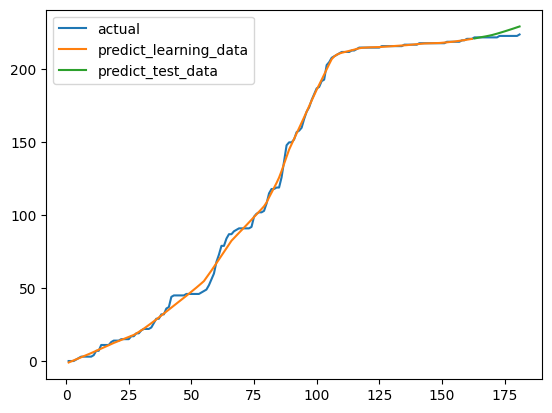

In [50]:
model.eval()

with torch.no_grad():
    y_pred_learning_tensor = model(X_train_tensor)
    y_pred_tensor = model(X_test_tensor)

plt.figure()
plt.plot(df['testing_date'], df['cum_number_of_fault'], label='actual')
plt.plot(scaler_X.inverse_transform(X_train_tensor.numpy()), scaler_y.inverse_transform(y_pred_learning_tensor.numpy()), label='predict_learning_data')
plt.plot(scaler_X.inverse_transform(X_test_tensor.numpy()), scaler_y.inverse_transform(y_pred_tensor.numpy()), label='predict_test_data')
plt.legend()
plt.show()